In [1]:
import subprocess as sp
import sys,os,shutil,pickle,time
from os.path import join


In [2]:
import pandas as pd
import numpy as np

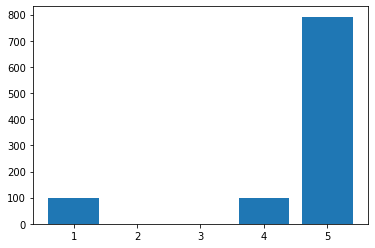

In [3]:
import matplotlib.pyplot as plt

dataset=pd.read_csv("samsungcamera2.csv")
summarised_results = dataset["stars"].value_counts()
plt.bar(summarised_results.keys(), summarised_results.values)
plt.show()

In [4]:
df = pd.read_csv('samsungcamera2.csv')
df.head(5)

,stars,comment,stopwords,punctuation,hastags,numerics,upper,word_count,char_count,avg_word
0,5,phone samsung apple x phone great compared dis...,19,2,0,0,1,26,177,5.8
1,5,product delievery late one day issues thanks a...,151,59,0,8,2,252,1530,5.4
2,5,confusion buy go oneplus confusion sharing rev...,194,75,0,3,29,249,1535,5.6
3,5,time samsung really try thing new special seri...,46,16,0,2,1,85,516,5.6
4,5,remove pre applied screen protector doesnt com...,58,37,0,0,0,102,564,5.2


In [5]:
import seaborn as sns
import string
import re
!pip install -q wordcloud
import wordcloud
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/nalinjindal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/nalinjindal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/nalinjindal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/nalinjindal/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [6]:
from textblob import TextBlob

df['comment']= df['comment'].astype(str)

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity


df['polarity'] = df['comment'].apply(pol)
df['subjectivity'] = df['comment'].apply(sub)
df

,stars,comment,stopwords,punctuation,hastags,numerics,upper,word_count,char_count,avg_word,polarity,subjectivity
0,5,phone samsung apple x phone great compared dis...,19,2,0,0,1,26,177,5.8,0.307143,0.416071
1,5,product delievery late one day issues thanks a...,151,59,0,8,2,252,1530,5.4,0.215291,0.384483
2,5,confusion buy go oneplus confusion sharing rev...,194,75,0,3,29,249,1535,5.6,0.292229,0.528701
3,5,time samsung really try thing new special seri...,46,16,0,2,1,85,516,5.6,0.358956,0.636806
4,5,remove pre applied screen protector doesnt com...,58,37,0,0,0,102,564,5.2,0.175668,0.347059
...,...,...,...,...,...,...,...,...,...,...,...,...
985,1,worth money price high waste money camera qual...,5,7,0,0,0,12,77,5.5,-0.185000,0.410000
986,5,guys lets cut crap lets straight onto review d...,113,50,0,5,14,197,1216,5.7,0.171154,0.549359
987,5,perfect smartphone reasonable price point phon...,56,37,0,2,5,114,767,6.4,0.461255,0.527201
988,4,good somehow camera disappointing,3,0,0,0,0,4,33,7.5,0.050000,0.650000


In [7]:
df['polarity'] = df['polarity'].round(2)
df['subjectivity'] = df['subjectivity'].round(2)
df.sample(5)

,stars,comment,stopwords,punctuation,hastags,numerics,upper,word_count,char_count,avg_word,polarity,subjectivity
48,4,good somehow camera disappointing,3,0,0,0,0,4,33,7.5,0.05,0.65
616,5,guys lets cut crap lets straight onto review d...,113,50,0,5,14,197,1216,5.7,0.17,0.55
960,5,awesome product samsungprosvery good audio qua...,42,12,0,0,0,68,557,7.4,0.44,0.56
669,5,awesome product samsungprosvery good audio qua...,42,12,0,0,0,68,557,7.4,0.44,0.56
278,4,good somehow camera disappointing,3,0,0,0,0,4,33,7.5,0.05,0.65


In [8]:
df2= pd.DataFrame()

In [9]:
for i in range (1,5):
  df2.loc[i,'polarity']= (df.head(100000).loc[df.stars == i].polarity.mean())
  df2.loc[i,'subjectivity']= (df.head(100000).loc[df.stars ==i].subjectivity.mean())

In [10]:
df2

,polarity,subjectivity
1,-0.18,0.41
2,NaN,NaN
3,NaN,NaN
4,0.05,0.65


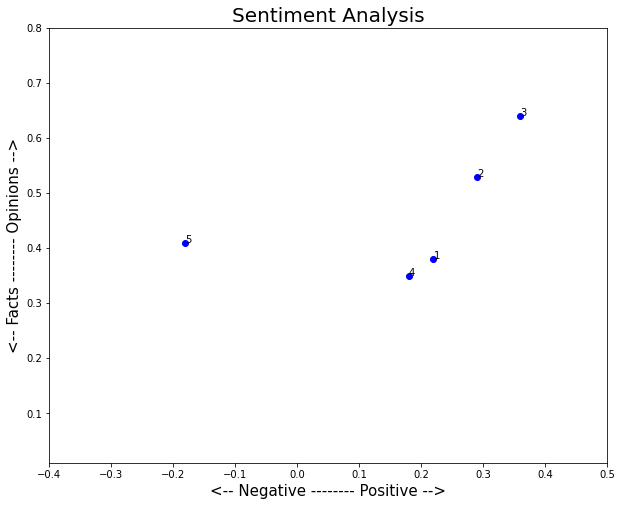

In [17]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index in range(1,6):
    x = df.polarity.loc[index]
    y = df.subjectivity.loc[index]
    plt.scatter(x, y, color='blue')
    plt.text(x+.0001, y+.0001, index, fontsize=10)
    plt.xlim(-0.4, .5) 
    plt.ylim(.01, 0.8) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [11]:
df2= df
df2['word_count']= df2['word_count'] //50*50

<AxesSubplot:xlabel='word_count'>

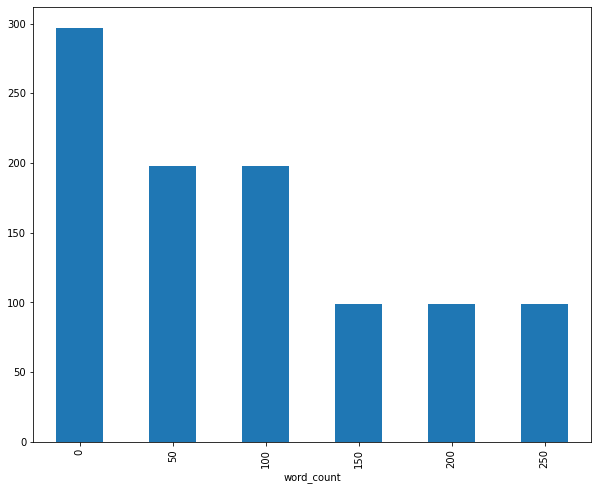

In [12]:
df.polarity.groupby(df.word_count // 50 * 50).count().plot(kind ='bar')

In [13]:
df_sub= df.loc[df.word_count //10*10]

/home/nalinjindal/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Subjectivity Score')

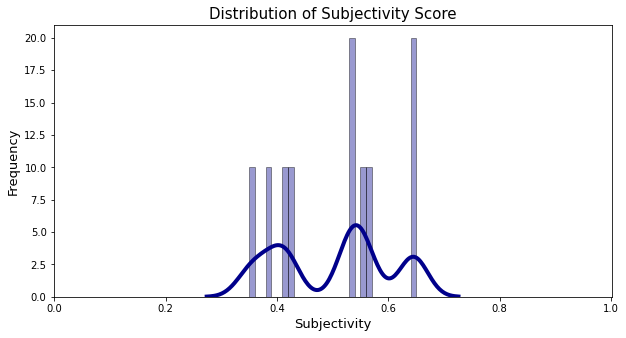

In [14]:
# Density Plot and Histogram of subjectivity
plt.figure(figsize=(10,5))
sns.distplot(df['subjectivity'], hist=True, kde=True, 
             bins=int(30), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlim([-0.001,1.001])
plt.xlabel('Subjectivity', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Distribution of Subjectivity Score', fontsize=15)